# RESOLVE DSP Tutorial #3: The Mystery of Dark Matter

### Instructions:
1. Press SHIFT+ENTER to run each "cell" of code (or hit the 'play' button on the left side of the cell).
2. Please run the cells in order, as the codes may otherwise fail or produce incorrect results. You can always start over from the Kernel menu.
3. Answer the questions in order and check your answers against those at the bottom of this page after completing the tutorial.

**Estimated Time to Complete this Tutorial**: 20-30 min

In this tutorial, you will use real galaxy rotation data (called "rotation curves") to infer the existence of dark matter in spiral galaxies. The data for this tutorial came from the RESOLVE (REsolved Spectroscopy Of a Local VolumE) survey, which is based at the University of North Carolina at Chapel Hill. For more information about RESOLVE, or to revisit previous tutorials from this series, please visit our website at https://resolve.astro.unc.edu/pages/outreach.php.

In [2]:
# to get started, press shift+enter or ctrl+enter to execute this cell and import the code libraries we need
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Matplotlib is building the font cache; this may take a moment.


## Part 1: Orbits in our Solar System

<img src = http://planetfacts.org/wp-content/uploads/2013/05/Planets-Orbital-Speeds.jpg
     width = "90%"/>
Credit: <a href=planetfacts.org>planetfacts.org</a> 

Here on Earth, we orbit the Sun at around 30 km/s (66 thousand mph). In contrast, Neptune, the most distant planet in our Solar System, orbits only at about 5 km/s. The reason is that planets orbit under the centripetal force of the Sun's gravitational pull. Using Newton's Universal Law of Gravitation, one can show that a planet in a circular orbit will have an orbital speed of

$$ v_{\rm planet} = \sqrt{\frac{GM_{\rm sun}}{r_{\rm planet}}}, $$

where $G$ is Newton's gravitational constant, $M_{\rm sun}$ is the mass of the Sun, and $r$ is the distance from the Sun to the planet.

The code block below contains pre-written variables to store the value of $G$ and $M_{\rm sun}$ as well as the distance to each planet in our Solar system. 

In [3]:
G_const = 6.67e-11 # m^3 / (kg s^2)
Msun = 1.989e30 # kg
r_planet = np.array([0.39, 0.72, 1., 1.52, 5.2, 9.5, 19.22, 30.06]) # distance to Mercury, Venus, ...., Neptune in AU
r_planet = r_planet * 1.496e+11 # convert to meters (1 AU = 1.496e11 m)

To visualize the orbital speed equation above, let's plot it for our solar system. Based on the equation, fill in the blank spaces in the `v_planet` line below, then run the cell. To check your plot, make sure the plotted velocities are consistent with the values in the cartoon above.

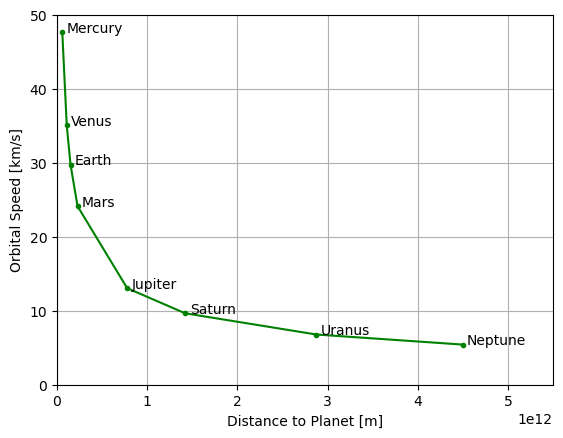

In [4]:
v_planet = np.sqrt((G_const)*(Msun)/(r_planet)) # <--- your code here!
v_planet = v_planet / 1000 # convert from m/s to km/s

plt.figure()
plt.plot(r_planet, v_planet, '.-', color='green')
planet_labels=['Mercury','Venus','Earth','Mars','Jupiter','Saturn','Uranus','Neptune']
for ii in range(len(planet_labels)):
    plt.annotate(planet_labels[ii],xy=(r_planet[ii]+0.05e12,v_planet[ii]))
plt.xlim(0,5.5e12)
plt.ylim(0,50)
plt.xlabel("Distance to Planet [m]")
plt.ylabel("Orbital Speed [km/s]")
plt.grid()
plt.show()

What you have just created is what astronomers call a ***rotation curve***, a mathematical relationship between the speeds of objects in orbit and their distances from their orbital center. The shape of this particular rotation curve is called *Keplerian* after the astronomer Johannes Kepler who first described planetary orbits in accurate mathematical form.

In this example, you wrote code to calculate the orbital velocity of the planets using their distances, knowing the mass of the Sun ahead of time. But imagine instead that you were to reverse engineer this task: you could instead determine the mass of the Sun if you knew the $v_{\rm planet}$ and $r_{\rm planet}$ values, for example from observations of the motions and positions of the planets. **The idea that astronomers can measure an object's mass using other objects' rotation velocities around it is key to unraveling the mysteries of dark matter.**

<b>Question 1: Ganymede is one of nearly 100 moons orbiting the planet Jupiter. If Ganymede orbits Jupiter at 10.9 km/s at a distance of $1.07\times 10^6\,\rm km$ from Jupiter, can you calculate Jupiter's mass? Would you get the same answer from a different moon?

## Part 2: Rotation Curves in Spiral Galaxies
We can extend the idea of measuring mass using rotation curves from our Solar System to entire galaxies. The distribution of mass in a galaxy, however, is more complex. The Sun makes up >99% of the total Solar System mass at a single point at the center, whereas in galaxies, stars and gas spread throughout the galaxy. In the Andromeda galaxy (pictured below in an image from __[NASA's Astronomy Picture of the Day](https://apod.nasa.gov)__), you can see that the distribution of light and matter varies as you look across the galaxy.

<img src = https://apod.nasa.gov/apod/image/0512/m31_gendler_Nmosaic1c50.jpg width = "60%" title=
    "Andromeda, nearest large neighbor of the Milky Way (Credit: NASA/Astronomy Picture of the Day)" />

To accomodate the more complicated distribution of mass in a galaxy, we can modify our equation for the orbital velocity as
$$ v(R) = \sqrt{\frac{GM(R)}{R}}, $$
where $v(R)$ is the rotation speed at a distance $R$ from the galactic center, $M(R)$ is the mass of the galaxy contained within that radius $R$, and $G$ is Newton's gravitational constant. We're treating the enclosed mass as if it were all at the center of the galaxy, the same way we treat the Earth as if its mass were all at the center of the Earth when we calculate Earth's gravity on balls, humans, and satellites.

<b>Question 2: The code block below plots a rotation curve using input data for a model galaxy consisting *only* of ordinary matter like gas and stars. Re-arrange the above equation to solve for $M(R)$, then fill in the `model_mass_Msun` line to calculate the mass of the galaxy. Note that your final answer (printed by the code) will be in units of solar masses ($M_\odot$), not kg, since we have provided distances in kiloparsecs, velocities in km/s, and Newton's gravitational constant as $G = 4.3 \times 10^{-6}\,\rm km^2\,kpc\,M_\odot^{-1}\,s^{-2}$. Compare the shape of the rotation curve to the one in Part 1. Why does it not fall so fast at first, and why does the outer part look the same?</b>

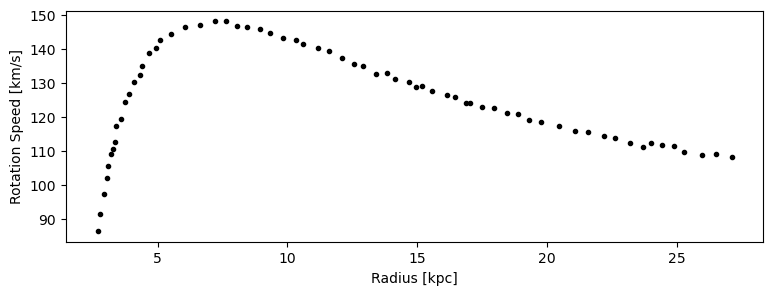

The total mass in this model galaxy is 73.7 billion solar masses


In [5]:
data=np.loadtxt(r'ModelGalaxyRC.csv',delimiter=',')
model_radius_kpc = data[:,0]
model_velocity_kms = data[:,1]

plt.figure(figsize=(9,3))
plt.plot(model_radius_kpc, model_velocity_kms, 'k.')
plt.xlabel("Radius [kpc]")
plt.ylabel("Rotation Speed [km/s]")
plt.show()

# calculate mass of galaxy
G_Msun_units = 4.3e-6 # km^2 kpc / (Msun s^2)
model_mass_Msun = (model_velocity_kms)**2. * (model_radius_kpc) / G_Msun_units
print("The total mass in this model galaxy is {:0.1f} billion solar masses".format(model_mass_Msun[-1]/1e9))

## Part 3: Vera Rubin Unveils a Mystery

Rubin at Kitt Peak Observatory, 1963 (Credit: KPNO/NOIRLab/NSF/AURA) | Rubin Measuring Spectra, 1974 (Credit: NOIRLab/NSF/AURA)           
:-------------------------:|:-------------------------:
 <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e8/Vera_Rubin_using_Kitt_Peak_National_Observatory%27s_36-inch_telescope.jpg/800px-Vera_Rubin_using_Kitt_Peak_National_Observatory%27s_36-inch_telescope.jpg" width="500" /> | <img src="https://i0.wp.com/eos.org/wp-content/uploads/2017/03/vera-rubin-at-scope-carnegie-1.jpg?w=820&ssl=1" width="500" /> 

**Vera Rubin (1928-2016)** was a U.S. astronomer who led pivotal work on galaxy rotation curves and who served as a lifelong advocate for women in STEM. Throughout the 1960s, she observed the rotation curves of hundreds of spiral galaxies (like Andromeda) using multiple telescopes. Excitingly, what she found forever changed humanity's understanding of the cosmos, and it illuminated one of the most enduring scientific puzzles about the Universe, still unsolved today. 

To rediscover her findings, you will use the following cell to analyze a *real* galaxy rotation curve from the RESOLVE survey. This small "dwarf" galaxy is named `rs0916` in the RESOLVE galaxy catalog and can be seen <a href="https://skyserver.sdss.org/dr12/en/tools/chart/navi.aspx?ra=192.11779&dec=3.440476&scale=0.2&width=120&height=120&opt="> at this link</a>. To analyze the data successfully, you will need to:

 1. Fill in the blanks in  the `plt.plot` line -- note that `plt. plot` takes x values (orbital radii) before y values (orbital velocities).
 2. Provide an appropriate label for the y-axis at line `plt.ylabel`.
 3. Calculate the mass of this galaxy by filling in the blanks to compute `rs0916_mass_Msun`. Hint: G was given in the last code block in the units you want.
 
The edited code will create a plot of the rotation curve and determine the total mass of the galaxy. You'll see that the rotation curve is actually two curves -- one for the each direction away from the center of the galaxy (where on one side the velocities are rotating toward us, and on the other side they're rotating away from us). In a model galaxy the two sides would be mirror images of each other, but in a real galaxy like this one, they're a little different.

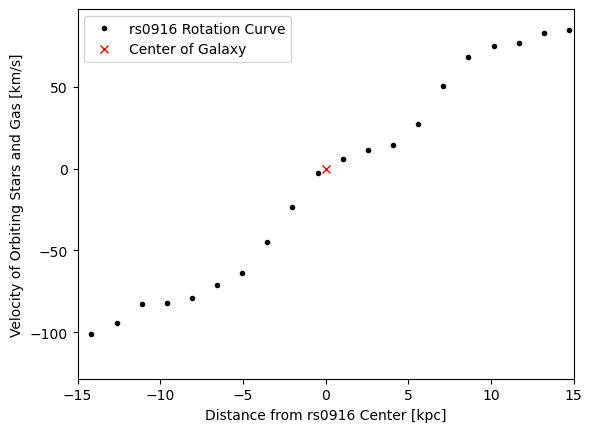

Total mass of rs0916 galaxy is approximately 65.7 billion solar masses


In [8]:
rs0916_rotation_curve = np.loadtxt(r"RC_rs0916.txt")
rs0916_radius_kpc = (rs0916_rotation_curve[:,0]) 
rs0916_velocity_kms = (rs0916_rotation_curve[:,1])

plt.figure()
plt.plot(rs0916_radius_kpc, rs0916_velocity_kms, 'k.', label='rs0916 Rotation Curve')
plt.plot([0],[0],'rx',label='Center of Galaxy')
plt.xlabel("Distance from rs0916 Center [kpc]")
plt.ylabel("Velocity of Orbiting Stars and Gas [km/s]")
plt.xlim(-15,15)
#plt.ylim(0,125)
plt.legend(loc='best')
plt.show()

rs0916_mass_Msun = (np.abs(rs0916_velocity_kms)**2.)*(np.abs(rs0916_radius_kpc)) / (G_Msun_units)
print('Total mass of rs0916 galaxy is approximately {:0.1f} billion solar masses'.format(rs0916_mass_Msun.max()/1e9))

**Question 3: This rotation curve does not resemble the Solar System rotation curve from Part #1 nor even the model galaxy rotation curve from Part #2. Also, your code should have calculated that the total mass of this galaxy is nearly 66 billion solar masses. However, based on independent measurements from the RESOLVE survey using the light emitted by the galaxy's gas and stars, the ordinary matter that our eyes and telescopes can see is only 6.7 billion solar masses. What is the percentage of this ordinary matter in `rs0916`? Compare to the model galaxy rotation curve of Part 2 -- how does the remaining matter show itself in the rotation curve?**


The discrepancy you are seeing historically sparked the "galaxy rotation problem," the scientific problem that galaxies seem to be rotating too fast given the amount of ordinary matter we can see with our telescopes. By unveiling this mystery, Vera Rubin provided the first convincing evidence that galaxies are *dominated* by an invisible and elusive type of matter that we cannot see, referred to as ***dark matter***. For this groundbreaking discovery, Rubin has been honored with many scientific awards, such as the National Medal of Science. She is also the namesake of the Vera C. Rubin Observatory, a new telescope that is designed to study dark matter and dark energy throughout the Universe.


### Do all galaxy rotation curves have the same shape?

When we compare the rotation curves of different types of galaxies, we can learn how the contents of these galaxies differ. In the previous exercise, we analyzed the rotation curve of `rs0916`, a tiny dwarf galaxy in the RESOLVE survey. You will now examine the rotation curve of <a href='https://cgs.obs.carnegiescience.edu/CGS/object_html_pages/NGC3145.html'>NGC 3145, one of numerous giant spiral galaxies</a> studied by Rubin and her collaborators (Rubin, Ford, and Thonnard, 1978). To do so, fill in the blanks below to plot the rotation velocity of NGC 3145 as a function of radius. You should also calculate the total mass of NGC 3145, building on the previous example. 

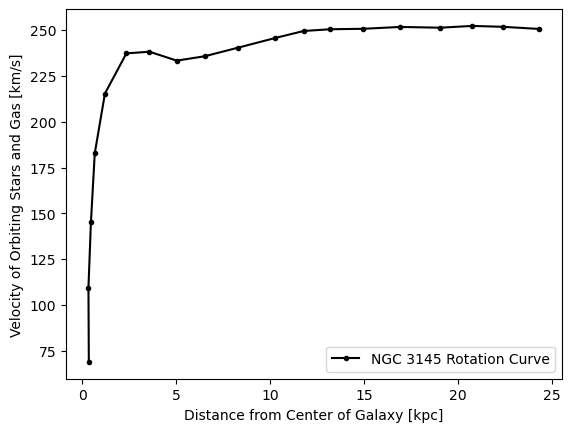

Total mass of NGC 3145 is approximately 355.2 billion solar masses


In [9]:
ngc3145_rotation_curve = np.loadtxt(r"RC_NGC3145.csv",delimiter=',')
ngc3145_radius_kpc = ngc3145_rotation_curve[:,0]
ngc3145_velocity_kms = ngc3145_rotation_curve[:,1]

plt.figure()
plt.plot(ngc3145_radius_kpc, ngc3145_velocity_kms, 'k.-', label='NGC 3145 Rotation Curve')
plt.xlabel("Distance from Center of Galaxy [kpc]")
plt.ylabel("Velocity of Orbiting Stars and Gas [km/s]")
plt.legend(loc='best')
plt.show()

ngc3145_mass_Msun = (np.abs(ngc3145_velocity_kms)**2.)*np.abs(ngc3145_radius_kpc) / (G_Msun_units)
print('Total mass of NGC 3145 is approximately {:0.1f} billion solar masses'.format(ngc3145_mass_Msun.max()/1e9))

NGC 3145 has a **flat** rotation curve, which means that the velocity values become approximately constant at large radii. This example contrasts with the **rising** rotation curve you plotted for `rs0916`, which grows continously as the radius increases. Flat rotation curves are characteristic of giant spiral galaxies, like those often observed by Vera Rubin, while rising rotation curves are characteristic of dwarf galaxies. Note that NGC 3145's total mass of 355 billion solar masses is more than 10 times that of `rs0916` (about 30 billion solar masses).

<b> Question 4: How does the dark matter content of a galaxy with a rising rotation curve differ from that of a galaxy with a flat rotation curve? How does the mass distribution change at large radii? Hint: Think about the equation</b> $M(R) = (v(R)^2 \times R) / G$.

## (4) A Search for Dark Matter

Rubin's work has inspired decades of experiments to probe what dark matter is and how it might work. Physicists and astronomers are still searching for answers, but here are three possibilities. 

### (a) Massive Compact Halo Objects (MACHOS)

One early hypothesis postulated that dark matter is not actually an undiscovered or exotic type of matter, but rather just consists of ordinary matter that is too faint to see. Such MACHOs might be in the form of black holes, neutron stars, or brown dwarf stars orbiting in the halo of the Milky Way. A search called the MACHOs Project was undertaken in the 1990s, which found that only 20% or less of the Milky Way's dark matter could be in the form MACHOs. Thus, while MACHOs may partly explain the dark matter mystery, it is not sufficient by itself.

### (b) Weakly Interacting Massive Particles (WIMPs)

Another hypothesis for dark matter is weakly interacting massive particles (WIMPs), a new and undiscovered type of fundamental subatomic particle (like quarks and electrons). To explain dark matter, these particles would need masses greater than the proton mass and interact only gravitationally, not electromagnetically, since dark matter does not interact with light. In a fundamental physics theory called "supersymmetry," WIMPs are predicted in abundance and have just the right mass to explain the dark matter problem. But unfortunately, dedicated experiments on instruments like XENON1T and the Large Hadron Collider have not yet found these WIMPs. WIMPs remain a leading candidate to explain dark matter, but the jury is still out.

Xenon1T Experiment (Credit: Roberto Corrieri and Patrick De Perio) | Large Hadron Collider (Credit: Lawrence Berkeley National Lab)           
:-------------------------:|:-------------------------:
 <img src="https://home.cern/sites/default/files/2018-06/170517-corrieri_deperio.jpg" width="300" /> | <img src="https://newscenter.lbl.gov/wp-content/uploads/2018/06/ATLAS-LHC-CERN.jpg" width="500" /> 


### (c) Axions

Axions are another type of theorized elementary particle, and if detected, could actually solve two problems in physics. In theoretical physics, axions are predicted to interact weakly and appear in extraordinary abundance, which could enable them to solve the dark matter problem. In addition, axions are a potential solution to the "strong CP problem," a physics mystery about how atomic nuclei behave and decay. The Axion Dark Matter eXperiment (ADMX) began taking data in 2010 and is actively running experiments to attempt detection of these axions.

ADMX Detector in Clean Room (Credit: Scientific American) | Scientists Upgrade the ADMX Detector (Credit: Washington University)           
:-------------------------:|:-------------------------:
<img src='https://static.scientificamerican.com/sciam/cache/file/18994F4D-726B-4355-A364C36043D20B62_source.jpg?w=900' width="300" /> | <img src='https://depts.washington.edu/admx/images/gallery/gallery_insert_out_of_magnet.jpg' width='300' />


## (5) Conclusion

Rotation curves -- the mathematical relationship between rotation speed and orbital radius -- represent a fundamental way that astronomers are able to measure the mass distribution in galaxies. In this tutorial, we followed the work of astronomer Vera Rubin and her discovery that spiral galaxy rotation curves are not Keplerian; rather, they are flat. With the test case of RESOLVE galaxy `rs0916`, you used a rotation curve to show that dark matter dominates over ordinary matter (gas and stars) in this galaxy at a ratio of nearly 9:1. Finally, we discussed ongoing experiments to detect candidates for this mysterious dark matter, including MACHOs, WIMPs, and axions. 

<br>
<b>Bonus Activity:</b> Check out this <a href=https://wittman.physics.ucdavis.edu/Animations/RotationCurve/index.html>rotation curve builder</a> by David Whittman (UC Davis). Can you adjust the amount of stars and dark matter to match the real rotation curve?


## Solutions

(1) Jupiter's moons follow the same equation as the planets orbiting the Sun, just with Jupiter's mass instead of the Sun's mass at the center of the orbits. Solving $v = \sqrt{GM/r}$ for the dominant central mass $M$ we get $M=v^2r/G$. Mass of Jupiter: $M = (10900\,{\rm m/s})^2 (1.07\times10^9{\rm\,m}) \,/\,(6.67\times10^{-11}{\rm N\,m^2\,kg^{-2}}) = 10877\,{\rm m/s} = 1.9 \times 10^{27}\,\rm kg$. Note that we converted km to meters before plugging into the equation; also, we used $1{\rm N}=1{\rm kg\,m\,/\,s^2}$. We would get the same answer using any moon of Jupiter -- the further-out moons would have lower orbital speeds so the mass of Jupiter would always come out the same.

(2) Re-arranging equation yields $M(R) = \frac{v(R)^2 G}{R}$. After substituting this equation into the code cell, the total mass of the model galaxy is $73.7 \times 10^9\, M_\odot$. The rotation curve of the galaxy doesn't fall off as fast as the rotation curve of the Solar System because almost all the mass in the Solar System is in a point in the middle (the Sun), whereas as you go out from the center of a galaxy $M(R)$ keeps growing at first, then tapers off so you see the same falloff in the outer galaxy rotation curve as for the Solar System.

(3) The ordinary matter (stars and gas) comprise 6.7 billion solar masses while the dark matter comprises 65.7 billion. Thus, the percentage of ordinary matter in `rs0916` is $\frac{6.7}{65.7}\times 100\% = 10.2\%$. The remaining "dark matter" is apparent because instead of falling, the `rs0916` rotation curve keeps rising, meaning even at large radii the rotation curve never gets beyond most of the galaxy's mass as it did in the falling part of the model galaxy rotation curve.

(4) For a flat rotation curve at large radii, since $v$ is approximately constant, the enclosed mass is approximately proportional to radius: $M\propto R$. But for a rising rotation curve at large radii, $v$ and $R$ are increasing *together*. As such, the enclosed mass $M$ grows faster for a dwarf galaxy with a rising rotation curve than for a spiral galaxy with a flat rotation curve. Dwarf galaxies typically contain a higher fraction of dark matter than larger galaxies. 